In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

### Prepare data and model

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def train_rf(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['squared_error', 'absolute_error', 'friedman_mse']
    MSE = 100
    for n_est in tqdm(params):
        for cri in criterion:
            rfc = RandomForestRegressor(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean((rfc_pred - y_test)**2) < MSE:
                MSE = np.mean((rfc_pred - y_test)**2)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestRegressor(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print('MSE', round(np.mean((rfc_pred - y_test)**2), 3))
    print('MAE', round(np.mean(np.abs(rfc_pred - y_test)), 3))
    print('R^2:', round(rfc.score(X_test, y_test), 3))

    # explainer = shap.TreeExplainer(rfc)
    # shap_values = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values, X_test, class_names=rfc.classes_)
    # print(rfc.classes_[0])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 0], X_test)
    # print(rfc.classes_[1])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 1], X_test)
    # print(rfc.classes_[2])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 2], X_test)

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances[:5])
    
    # X = merged_df[feature_importances.index[:len(feature_importances)//2]]
    # y = merged_df['crash_likelihood']

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    # MSE = 100
    # for n_est in params:
    #     for cri in criterion:
    #         rfc = RandomForestRegressor(n_estimators=n_est, random_state=random_state, criterion=cri)
    #         rfc.fit(X_train, y_train)

    #         rfc_pred = rfc.predict(X_test)
    #         # calculate accuracy
    #         if np.mean((rfc_pred - y_test)**2) < MSE:
    #             MSE = np.mean((rfc_pred - y_test)**2)
    #             best_params_est, best_params_cri = n_est, cri

    # # rerun the model with the highest accuracy
    # rfc = RandomForestRegressor(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    # rfc.fit(X_train, y_train)
    # rfc_pred = rfc.predict(X_test)

    # print('n_estimators:', best_params_est)
    # print('Criteria:', best_params_cri)
    # print('MSE', round(np.mean((rfc_pred - y_test)**2), 3))
    # print('MAE', round(np.mean(np.abs(rfc_pred - y_test)), 3))
    # print('R^2:', round(rfc.score(X_test, y_test), 3))

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

def train_gradient_boosted(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['squared_error', 'friedman_mse']
    MSE = 100
    for n_est in tqdm(params):
        for cri in criterion:
            rfc = GradientBoostingRegressor(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean((rfc_pred - y_test)**2) < MSE:
                MSE = np.mean((rfc_pred - y_test)**2)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = GradientBoostingRegressor(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print('MSE', round(np.mean((rfc_pred - y_test)**2), 3))
    print('MAE', round(np.mean(np.abs(rfc_pred - y_test)), 3))
    print('R^2:', round(rfc.score(X_test, y_test), 3))

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances[:5])

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

def train_knn(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [5, 10, 20, 50]
    criterion = ['uniform', 'distance']
    MSE = 100
    for n_est in tqdm(params):
        for cri in criterion:
            rfc = KNeighborsRegressor(n_neighbors=n_est, weights=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean((rfc_pred - y_test)**2) < MSE:
                MSE = np.mean((rfc_pred - y_test)**2)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = KNeighborsRegressor(n_neighbors=best_params_est, weights=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print('MSE', round(np.mean((rfc_pred - y_test)**2), 3))
    print('MAE', round(np.mean(np.abs(rfc_pred - y_test)), 3))
    print('R^2:', round(rfc.score(X_test, y_test), 3))

In [5]:
data = pd.read_csv('../../0_data/1_intermediate_ML/selected_features_one_hot_complexity_32_continuous_demanding_crash.csv')
data.columns

Index(['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count', 'image_id', 'weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', 'speed', 'speed_std', 'speed_mean',
       'lon_acceleration_mean', 'lon_acceleration_std', 'lon_acceleration_max',

In [6]:
features = {
    'oneformer': ['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count'],
    'semantic': ['weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide'],
    'complexity': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'],
    'driving': ['speed', 'speed_std', 'speed_mean',
       'lon_acceleration_mean', 'lon_acceleration_std', 'lon_acceleration_max',
       'lon_acceleration_min', 'speed_deviation',
       'speed_deviation_normalized']
}

In [7]:
del data['image_id']

### Modeling

#### complexity features

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [26:46<00:00, 229.48s/it]


n_estimators: 200
Criteria: squared_error
MSE 1.659
MAE 0.883
R^2: 0.529
    importance
17    0.072846
10    0.066440
20    0.059014
14    0.058341
8     0.056177


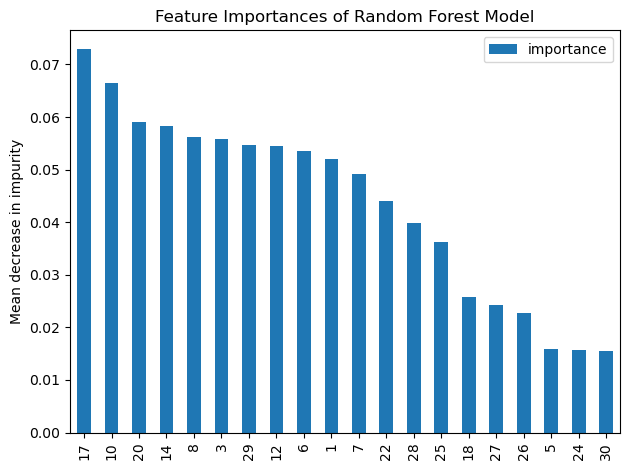

In [8]:
train_rf(data[features['complexity'] + ['crash_likelihood']])

100%|██████████| 7/7 [00:30<00:00,  4.40s/it]


n_estimators: 200
Criteria: friedman_mse
MSE 2.491
MAE 1.171
R^2: 0.293
    importance
10    0.077854
6     0.070129
17    0.069210
22    0.066262
29    0.062965


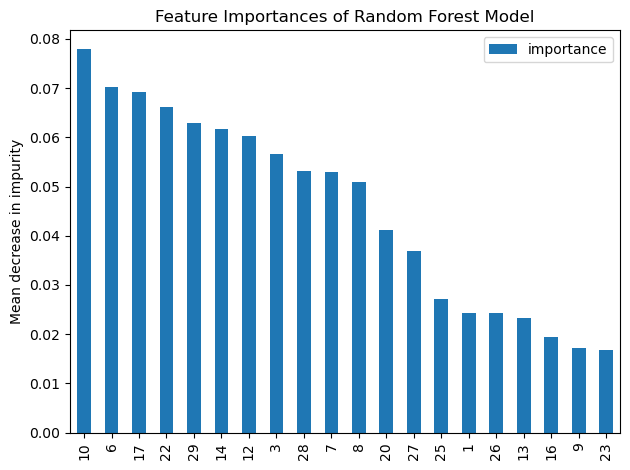

In [9]:
train_gradient_boosted(data[features['complexity'] + ['crash_likelihood']])

In [10]:
train_knn(data[features['complexity'] + ['crash_likelihood']])

100%|██████████| 4/4 [00:00<00:00,  6.97it/s]

n_estimators: 50
Criteria: distance
MSE 1.549
MAE 0.767
R^2: 0.561


#### Oneformer

100%|██████████| 7/7 [08:17<00:00, 71.11s/it] 


n_estimators: 200
Criteria: friedman_mse
MSE 1.695
MAE 0.923
R^2: 0.519
                     importance
lead_car_vegetation    0.310891
vegetation             0.120993
road                   0.081444
lead_car_road          0.073526
building               0.072137


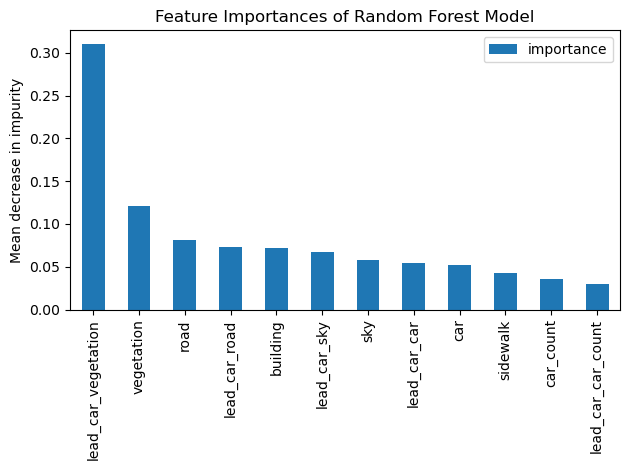

In [22]:
train_rf(data[features['oneformer'] + ['crash_likelihood']])

100%|██████████| 7/7 [00:10<00:00,  1.44s/it]


n_estimators: 200
Criteria: squared_error
MSE 1.956
MAE 1.025
R^2: 0.445
                     importance
lead_car_vegetation    0.362914
vegetation             0.255843
building               0.074742
lead_car_road          0.050878
car_count              0.049200


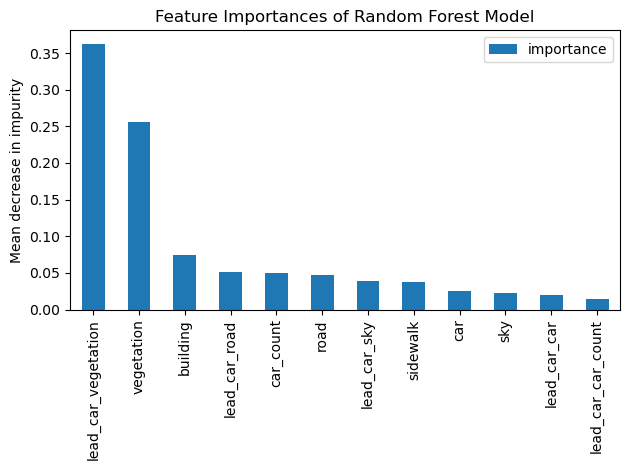

In [20]:
train_gradient_boosted(data[features['oneformer'] + ['crash_likelihood']])

In [21]:
train_knn(data[features['oneformer'] + ['crash_likelihood']])

100%|██████████| 4/4 [00:00<00:00, 14.94it/s]


n_estimators: 50
Criteria: distance
MSE 2.073
MAE 1.014
R^2: 0.412


#### Driving

In [ ]:
train_rf(data[features['driving'] + ['crash_likelihood']])

In [ ]:
train_gradient_boosted(data[features['driving'] + ['crash_likelihood']])

In [ ]:
train_knn(data[features['driving'] + ['crash_likelihood']])

#### Oneformer + driving

100%|██████████| 7/7 [17:13<00:00, 147.60s/it]


n_estimators: 200
Criteria: squared_error
MSE 1.156
MAE 0.732
R^2: 0.672
                            importance
lead_car_vegetation           0.283464
vegetation                    0.091488
speed                         0.062413
speed_mean                    0.062165
speed_deviation_normalized    0.043555


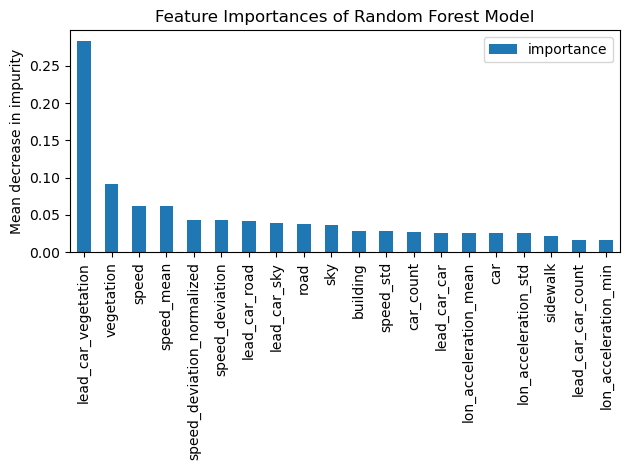

In [17]:
train_rf(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])

100%|██████████| 7/7 [00:23<00:00,  3.41s/it]


n_estimators: 200
Criteria: friedman_mse
MSE 1.656
MAE 0.943
R^2: 0.53
                     importance
lead_car_vegetation    0.266817
vegetation             0.252349
speed                  0.069047
speed_mean             0.057258
speed_deviation        0.040292


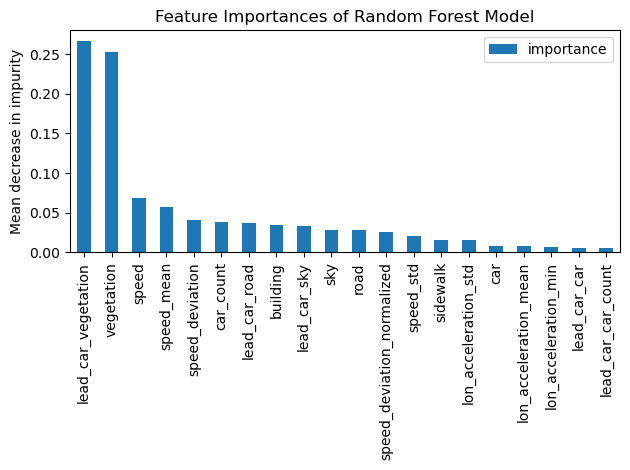

In [18]:
train_gradient_boosted(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])

In [19]:
train_knn(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])

100%|██████████| 4/4 [00:00<00:00, 16.72it/s]

n_estimators: 50
Criteria: distance
MSE 1.577
MAE 0.839
R^2: 0.553


#### semantic + driving

In [ ]:
train_rf(data[features['driving'] + features['semantic'] + ['crash_likelihood']])

In [ ]:
train_gradient_boosted(data[features['driving'] + features['semantic'] + ['crash_likelihood']])

In [ ]:
train_knn(data[features['driving'] + features['semantic'] + ['crash_likelihood']])

#### Oneformer + driving + semantic

100%|██████████| 7/7 [20:09<00:00, 172.72s/it]


n_estimators: 200
Criteria: squared_error
MSE 0.846
MAE 0.612
R^2: 0.76
                     importance
lead_car_vegetation    0.277492
vegetation             0.085309
speed_mean             0.056204
speed                  0.055334
speed_deviation        0.041396


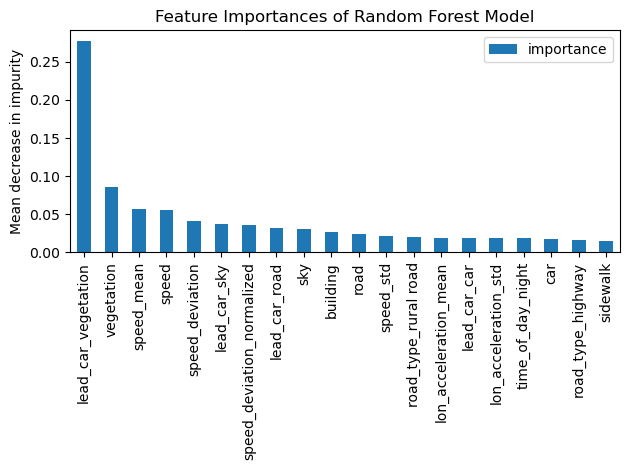

In [14]:
train_rf(data[features['oneformer'] + features['driving'] + features['semantic'] + ['crash_likelihood']])

100%|██████████| 7/7 [00:25<00:00,  3.58s/it]


n_estimators: 200
Criteria: friedman_mse
MSE 1.386
MAE 0.864
R^2: 0.607
                     importance
lead_car_vegetation    0.239815
vegetation             0.238712
speed_mean             0.066810
speed                  0.048921
speed_deviation        0.048327


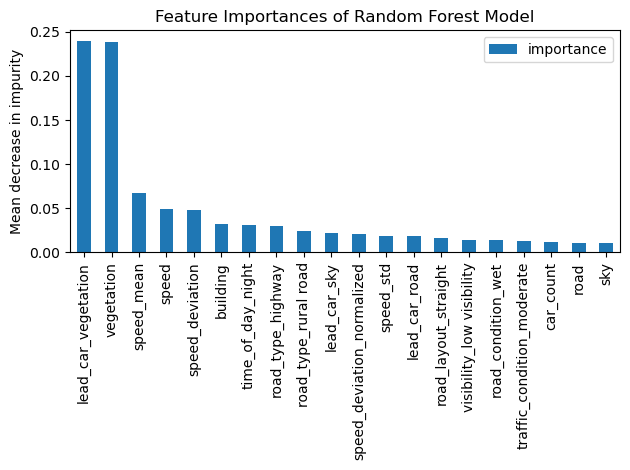

In [15]:
train_gradient_boosted(data[features['oneformer'] + features['driving'] + features['semantic'] + ['crash_likelihood']])

In [16]:
train_knn(data[features['oneformer'] + features['driving'] + features['semantic'] + ['crash_likelihood']])

100%|██████████| 4/4 [00:00<00:00, 13.33it/s]


n_estimators: 50
Criteria: distance
MSE 1.133
MAE 0.665
R^2: 0.679


#### oneformer + semantic

n_estimators: 200
Criteria: absolute_error
MSE 2.125
MAE 1.133
R^2: 0.293
                     importance
vegetation             0.227162
lead_car_vegetation    0.114319
lead_car_car           0.083115
lead_car_road          0.062153
road                   0.061690


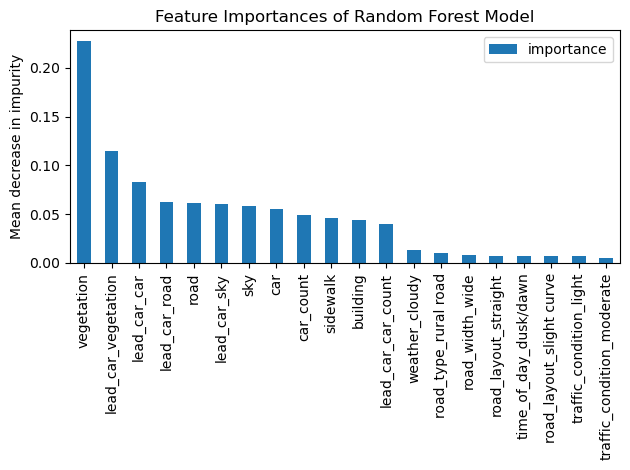

In [ ]:
train_rf(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
MSE 2.05
MAE 1.139
R^2: 0.318
                           importance
vegetation                   0.502085
lead_car_vegetation          0.149778
lead_car_car                 0.080131
time_of_day_night            0.048012
visibility_low visibility    0.030169


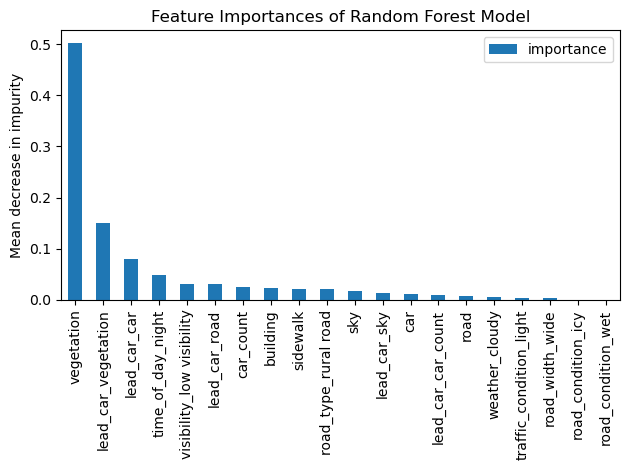

In [ ]:
train_gradient_boosted(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

In [ ]:
train_knn(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

n_estimators: 50
Criteria: distance
MSE 2.075
MAE 1.142
R^2: 0.31


#### oneformer + semantic + driving + complexity

100%|██████████| 7/7 [1:49:28<00:00, 938.29s/it] 


n_estimators: 200
Criteria: friedman_mse
MSE 0.738
MAE 0.571
R^2: 0.791
                     importance
lead_car_vegetation    0.266322
vegetation             0.079179
speed                  0.044165
speed_mean             0.041860
speed_deviation        0.029195


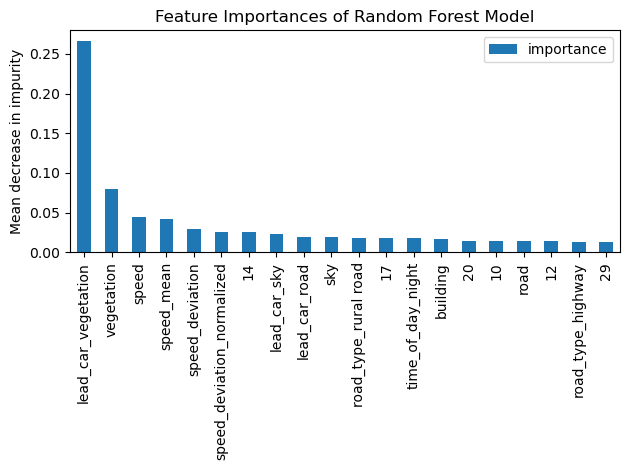

In [11]:
train_rf(data[features['oneformer'] + features['semantic'] + features['driving'] + features['complexity'] + ['crash_likelihood']])

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [05:08<00:00, 44.10s/it]


n_estimators: 200
Criteria: friedman_mse
MSE 1.241
MAE 0.822
R^2: 0.648
                     importance
lead_car_vegetation    0.226454
vegetation             0.220645
speed_mean             0.056095
speed                  0.047647
speed_deviation        0.041725


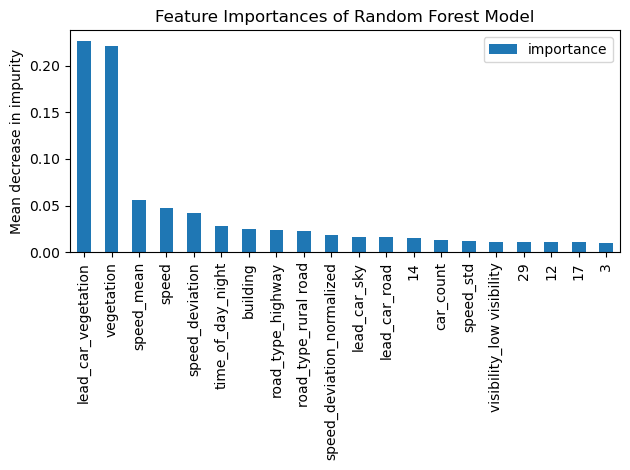

In [12]:
train_gradient_boosted(data[features['oneformer'] + features['semantic'] + features['driving'] + features['complexity'] + ['crash_likelihood']])

In [13]:
train_knn(data[features['oneformer'] + features['semantic'] + features['complexity'] + features['driving'] + ['crash_likelihood']])

100%|██████████| 4/4 [00:00<00:00,  8.16it/s]


n_estimators: 50
Criteria: distance
MSE 0.984
MAE 0.596
R^2: 0.721


### Archive

n_estimators: 200
Criteria: friedman_mse
MSE 2.066
MAE 1.107
R^2: 0.313
                     importance
vegetation             0.246441
lead_car_vegetation    0.110751
lead_car_car           0.034903
2                      0.032861
16                     0.029703


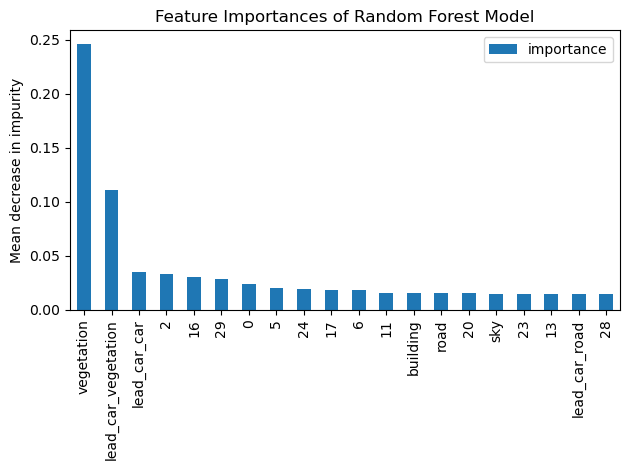

In [33]:
train_rf(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
MSE 1.949
MAE 1.095
R^2: 0.352
                     importance
vegetation             0.337912
lead_car_vegetation    0.134915
16                     0.056478
2                      0.046509
lead_car_car           0.045577


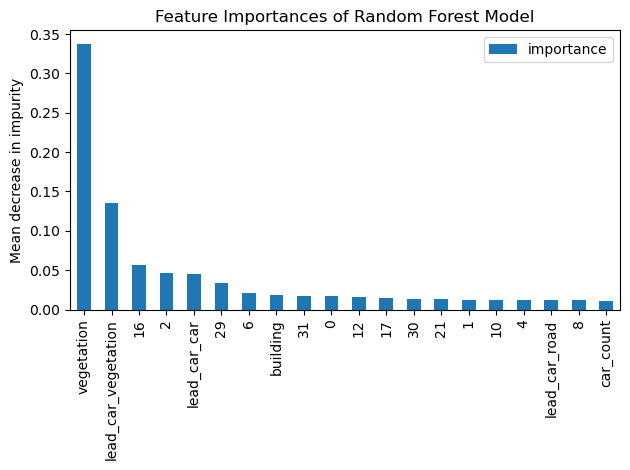

In [34]:
train_gradient_boosted(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

In [35]:
train_knn(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

n_estimators: 50
Criteria: distance
MSE 2.084
MAE 1.141
R^2: 0.307


n_estimators: 200
Criteria: squared_error
MSE 2.048
MAE 1.099
R^2: 0.319
    importance
2     0.173610
11    0.055948
4     0.048240
19    0.044970
1     0.043878


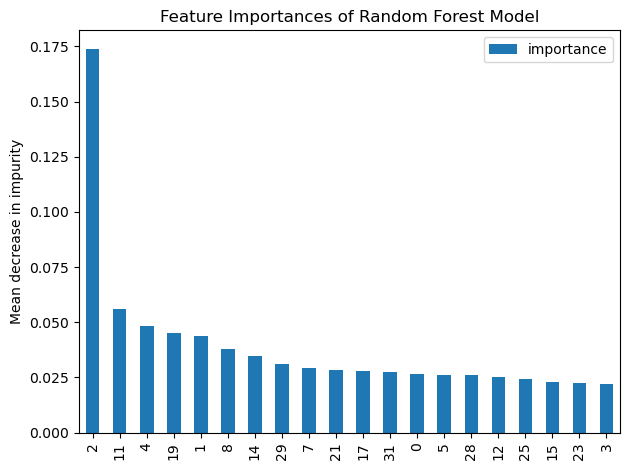

In [36]:
train_rf(data[features['complexity'] + features['semantic'] + ['crash_likelihood']])

n_estimators: 200
Criteria: friedman_mse
MSE 2.141
MAE 1.149
R^2: 0.288
    importance
2     0.247556
4     0.066988
29    0.054232
1     0.048152
23    0.047427


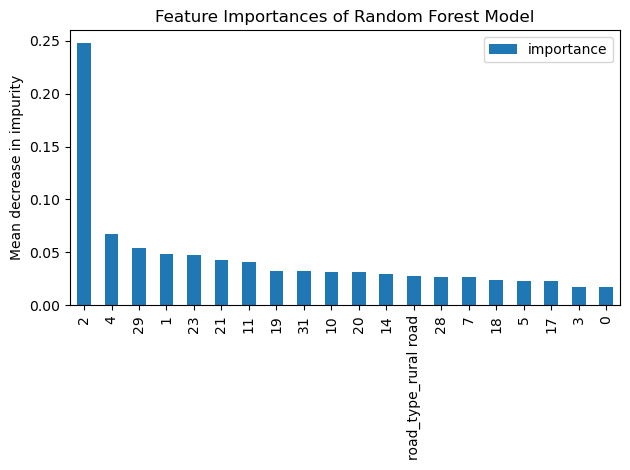

In [37]:
train_gradient_boosted(data[features['complexity'] + features['semantic'] + ['crash_likelihood']])

In [38]:
train_knn(data[features['complexity'] + features['semantic'] + ['crash_likelihood']])

n_estimators: 50
Criteria: distance
MSE 2.305
MAE 1.174
R^2: 0.233
